In [1]:
import geopandas as gpd
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import yaml
import pandas as pd
from rasterio.crs import CRS

In [2]:
yaml_file = '../events/papau_new_guinea_landslide_2024.yml' #'porto_algre.yml'
with open(yaml_file) as f:
    event_dict = yaml.safe_load(f)["event"]
event_dict

{'event_name': 'papau_new_guinea_landslide_2024',
 'bounds': [143.3, -5.4, 143.4, -5.3],
 'event_date': '2024-05-24',
 'pre_event_window_days': 100,
 'post_event_window_days': 60,
 'rtc_track_numbers': [9, 133],
 'mgrs_tiles': ['54MYV'],
 'dist_hls_confirmed_change_min_days': 15,
 'source_id': 'Al Handwerger derived from Planet 3m',
 'links': ['https://www.cnn.com/2024/05/28/asia/papua-new-guinea-landslide-satellite-imagery-intl/index.html']}

In [3]:
df_event = gpd.read_file('../external_validation_data/PNG_Landslide_2024/').to_crs(4326)
df_event.head()

,id,geometry
0,None,"POLYGON ((143.36415 -5.38270, 143.36394 -5.382..."


In [4]:
df_event.to_crs(4326).total_bounds

array([143.36376211,  -5.38284491, 143.366189  ,  -5.37745081])

<Axes: >

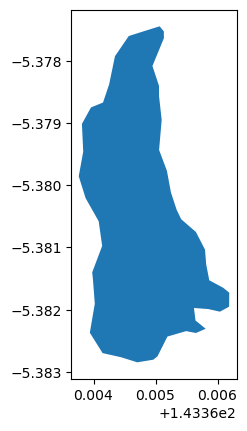

In [5]:
df_event.plot()

In [6]:
geo = df_event.geometry.unary_union

df_event_f = gpd.GeoDataFrame({'name': [event_dict['event_name']],
                               'date': [pd.to_datetime(event_dict['event_date'])],
                               'source_id': [f'{event_dict["source_id"]}']},
                              geometry=[geo],
                              crs=CRS.from_epsg(4326))
df_event_f.head()

,name,date,source_id,geometry
0,papau_new_guinea_landslide_2024,2024-05-24,Al Handwerger derived from Planet 3m,"POLYGON ((143.36415 -5.38270, 143.36394 -5.382..."


In [7]:
EXTERNAL_VAL_DATA_DIR = Path('../external_validation_data_db/')
EXTERNAL_VAL_DATA_DIR.mkdir(exist_ok=True, parents=True)

In [8]:
df_event_f.to_file(EXTERNAL_VAL_DATA_DIR / f'{event_dict["event_name"]}.geojson', driver='GeoJSON')